In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [4]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
print(f"Количество итераций: {model.n_iter_[0]}")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Количество итераций: 11
Точность модели: 1.0000

Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Отчет классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



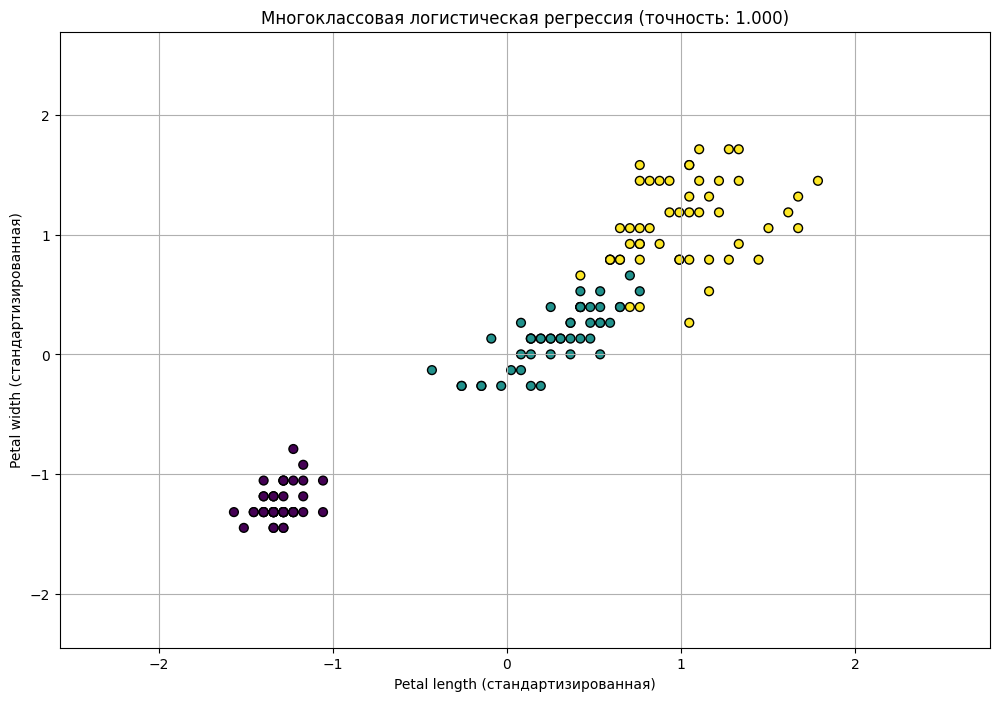


Коэффициенты модели:
Класс 0 (setosa) vs остальные:
Petal length: -2.3392, Petal width: -2.0640

Класс 1 (versicolor) vs остальные:
Petal length: 0.1174, Petal width: -0.3485

Класс 2 (virginica) vs остальные:
Petal length: 2.2218, Petal width: 2.4124


In [9]:
plt.figure(figsize=(12, 8))
h = 0.02 
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', s=40)
plt.xlabel('Petal length (стандартизированная)')
plt.ylabel('Petal width (стандартизированная)')
plt.title(f"Многоклассовая логистическая регрессия (точность: {accuracy:.3f})")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

# Вывод коэффициентов модели
print("\nКоэффициенты модели:")
print("Класс 0 (setosa) vs остальные:")
print(f"Petal length: {model.coef_[0][0]:.4f}, Petal width: {model.coef_[0][1]:.4f}")
print("\nКласс 1 (versicolor) vs остальные:")
print(f"Petal length: {model.coef_[1][0]:.4f}, Petal width: {model.coef_[1][1]:.4f}")
print("\nКласс 2 (virginica) vs остальные:")
print(f"Petal length: {model.coef_[2][0]:.4f}, Petal width: {model.coef_[2][1]:.4f}")